In [2]:
import numpy as np
import pandas as pd

In [5]:
data= pd.read_csv("Mall_Customers.csv")

In [6]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data= data[['Annual Income (k$)','Spending Score (1-100)']]

In [12]:
data.head(5)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

In [21]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


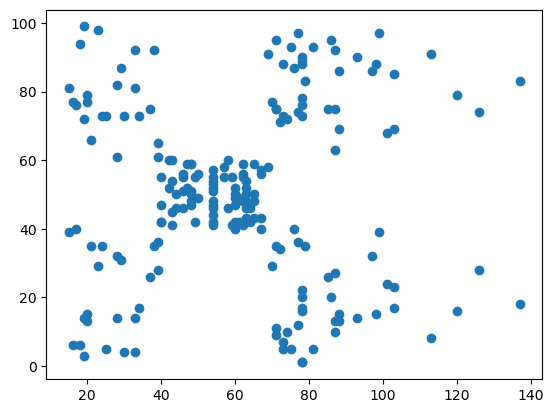

In [22]:
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [23]:
import seaborn as sns


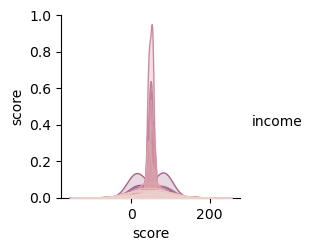

In [24]:
sns.pairplot(data, hue="income")
plt.show()

In [37]:
# calculate sum of squares errors for different K values
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_) # Fixed: inertia_ is an attribute of the model, not data

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [38]:
wcss_error

[269981.28,
 185917.14253928524,
 106348.37306211119,
 82472.19413919414,
 44454.47647967974,
 38858.9599751439,
 36418.740400968076,
 26979.8946033696,
 24382.532654258586,
 21271.81250275216]

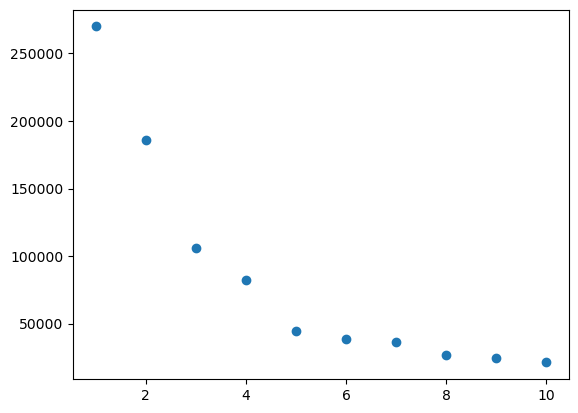

In [39]:
plt.scatter(k_values, wcss_error)

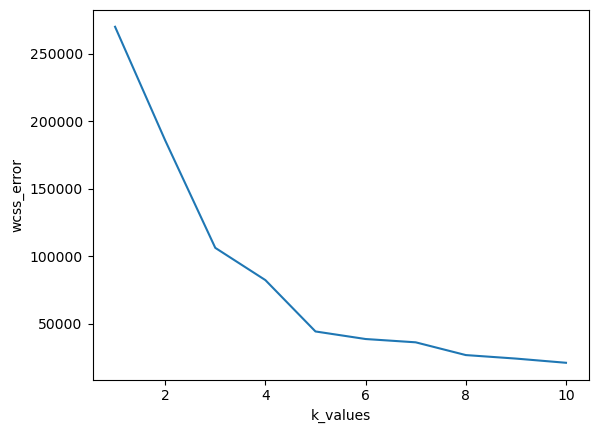

In [42]:
plt.xlabel('k_values')
plt.ylabel('wcss_error')
plt.plot(k_values, wcss_error)

In [50]:
model = KMeans(n_clusters=5)
pred =model.fit_predict(data)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
pred

array([3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2,
       3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 0, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [52]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [53]:
data['cluster']= pred

In [54]:
data.head(5)

,income,score,cluster
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3


In [56]:
c1 = data[data['cluster']==0]

In [57]:
c1.head(5)

,income,score,cluster
7,18,94,0
11,19,99,0
19,23,98,0
25,28,82,0
29,29,87,0


In [58]:
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]

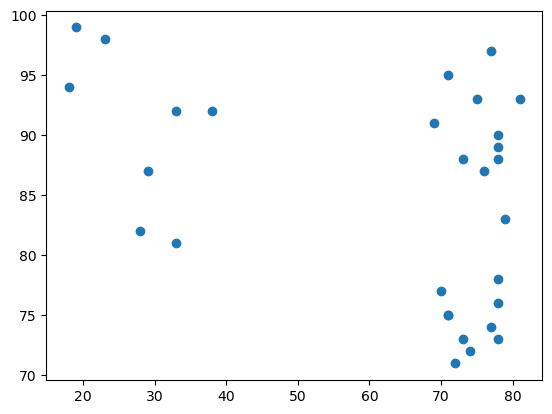

In [60]:
plt.scatter(c1['income'],c1['score'])

In [ ]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c1['score'])
plt.scatter(c3['income'],c1['score'])
plt.scatter(c4['income'],c1['score'])
plt.scatter(c1['income'],c1['score'])